In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
dataset = pd.read_csv('dfdata.csv')

In [4]:
dataset

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [5]:
x = dataset.iloc[:,:-1]

In [6]:
x

,Home Owner,Marital Status,Annual Income
0,Yes,Single,125
1,No,Married,100
2,No,Single,70
3,Yes,Married,120
4,No,Divorced,95
5,No,Married,60
6,Yes,Divorced,220
7,No,Single,85
8,No,Married,75
9,No,Single,90


In [7]:
y = dataset.iloc[:,2]

In [8]:
y

0    125
1    100
2     70
3    120
4     95
5     60
6    220
7     85
8     75
9     90
Name: Annual Income, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
labelencoder_x = LabelEncoder()

In [11]:
x = x.apply(LabelEncoder().fit_transform)

In [12]:
x

,Home Owner,Marital Status,Annual Income
0,1,2,8
1,0,1,6
2,0,2,1
3,1,1,7
4,0,0,5
5,0,1,0
6,1,0,9
7,0,2,3
8,0,1,2
9,0,2,4


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
regressor=DecisionTreeClassifier()

In [15]:
regressor.fit(x.iloc[:,1:5],y)

DecisionTreeClassifier()

In [16]:
x_in = np.array([1,1])

In [17]:
y_pred = regressor.predict([x_in])

In [18]:
y_pred

array([70], dtype=int64)

In [19]:
from six import StringIO

In [20]:
from IPython.display import Image

In [21]:
from sklearn.tree import export_graphviz

In [22]:
import pydotplus

In [23]:
dot_data = StringIO()

In [24]:
dataset.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes


In [25]:
dataset.shape

(10, 4)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Home Owner          10 non-null     object
 1   Marital Status      10 non-null     object
 2   Annual Income       10 non-null     int64 
 3   Defaulted Borrower  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [27]:
d={'Yes':1,'No':0}
dataset['Home Owner']=dataset['Home Owner'].map(d)
dataset['Defaulted Borrower']=dataset['Defaulted Borrower'].map(d)
d1={'Single':0,'Married':1,'Divorced':2}
dataset['Marital Status']=dataset['Marital Status'].map(d1)
dataset.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,0,125,0
1,0,1,100,0
2,0,0,70,0
3,1,1,120,0
4,0,2,95,1


In [28]:
dataset.columns

Index(['Home Owner', 'Marital Status', 'Annual Income', 'Defaulted Borrower'], dtype='object')

In [29]:
x=dataset[['Home Owner', 'Marital Status', 'Annual Income']]
y=dataset['Defaulted Borrower']
features=list(dataset.columns[:3])
print(features)

['Home Owner', 'Marital Status', 'Annual Income']


In [30]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy',splitter='random')
model=model.fit(x,y)

In [31]:
tree.export_graphviz(model,out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [32]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

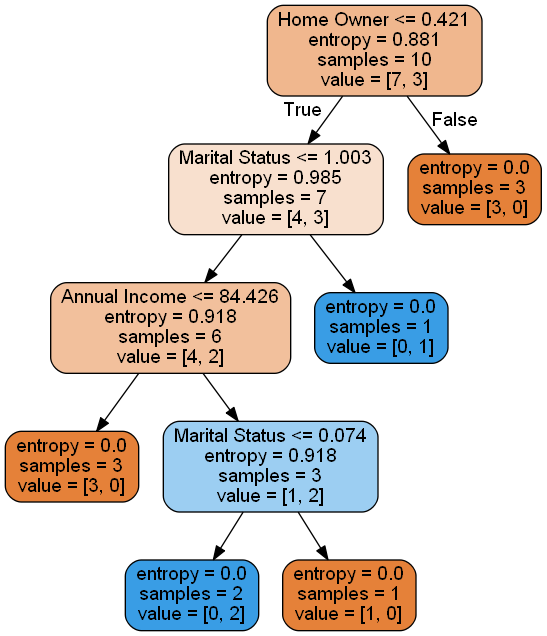

In [33]:
Image(graph.create_png())

In [34]:
graph.write_png("tree.png")

True

In [35]:
from sklearn.tree import export_text

r = export_text(model, feature_names=features)
print(r)

|--- Home Owner <= 0.42
|   |--- Marital Status <= 1.00
|   |   |--- Annual Income <= 84.43
|   |   |   |--- class: 0
|   |   |--- Annual Income >  84.43
|   |   |   |--- Marital Status <= 0.07
|   |   |   |   |--- class: 1
|   |   |   |--- Marital Status >  0.07
|   |   |   |   |--- class: 0
|   |--- Marital Status >  1.00
|   |   |--- class: 1
|--- Home Owner >  0.42
|   |--- class: 0



In [36]:
dataset.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,0,125,0
1,0,1,100,0
2,0,0,70,0
3,1,1,120,0
4,0,2,95,1


In [37]:
model.predict([[0,0,150]])

array([1], dtype=int64)

In [38]:
model.predict([[1,1,150]])

array([0], dtype=int64)

In [39]:
model.predict([[0,2,75]])

array([1], dtype=int64)

In [40]:
model.predict([[1,0,75]])

array([0], dtype=int64)